In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [43]:
X, Y = load_digits(return_X_y=True)

In [44]:
from sklearn.cluster import AgglomerativeClustering, KMeans

aggl_clustering = AgglomerativeClustering(n_clusters=10)
km_clustering = KMeans(n_clusters=10, n_init=10)

In [45]:
aggl_pred = aggl_clustering.fit_predict(X)
aggl_pred.shape

(1797,)

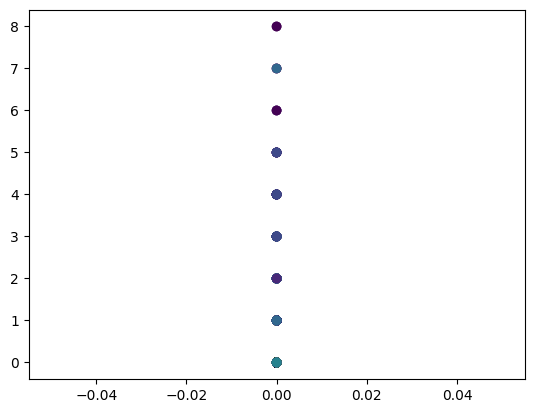

In [46]:
plt.scatter(X[:,0], X[:,1], c=aggl_pred);

In [47]:
km_pred = km_clustering.fit_predict(X)
km_pred.shape

(1797,)

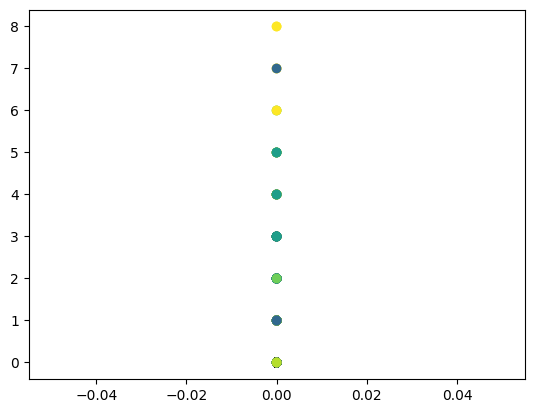

In [48]:
plt.scatter(X[:,0], X[:,1], c=km_pred);

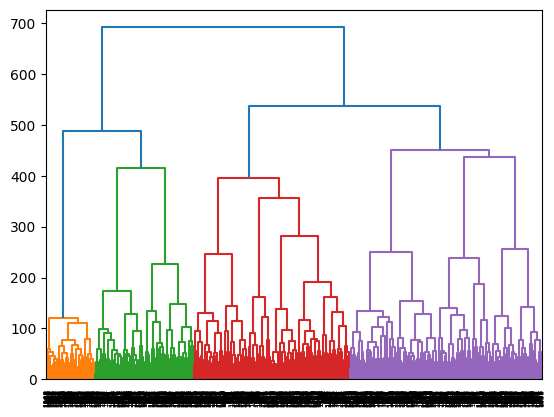

In [49]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [50]:
from sklearn.metrics import silhouette_score

agg_score = silhouette_score(X, aggl_clustering.labels_)
print("Качество иерархической кластеризации по метрике силуэтта %.3f" % agg_score)

km_score = silhouette_score(X, km_clustering.labels_)
print("Качество k-means кластеризации по метрике силуэтта %.3f" % km_score)

Качество иерархической кластеризации по метрике силуэтта 0.178
Качество k-means кластеризации по метрике силуэтта 0.182
